<a href="https://colab.research.google.com/github/vTheWise/Hands_On/blob/images/Image_Classification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
import os

In [9]:
import matplotlib.pyplot as plt

# Data Handling

## Download Raw Data

In [2]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   140M      0  0:00:05  0:00:05 --:--:--  146M


In [3]:
!unzip -q kagglecatsanddogs_5340.zip

In [4]:
!ls

 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'


In [5]:
!ls PetImages

Cat  Dog


## Filter out corrupted images


*  filter out badly-encoded images that do not feature the string "JFIF" in their header
* The peek() function can be used to peek into file content without moving the position of the cursor in the file. This function is only available for files opened in binary mode



In [7]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


## Generate Dataset

* tf.keras.utils.image_dataset_from_directory: 
  * Generates a tf.data.Dataset from image files in a directory 

* If your directory structure is:

    ```
      main_directory/
      ...class_a/
      ......a_image_1.jpg
      ......a_image_2.jpg
      ...class_b/
      ......b_image_1.jpg
      ......b_image_2.jpg
    ```
    Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

* When subset="both", the utility returns a tuple of two datasets (the training
and validation datasets respectively

In [8]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


## Data Visualization

* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

```
take(
    count, name=None
)
```
Creates a Dataset with at most **count** elements from this dataset.



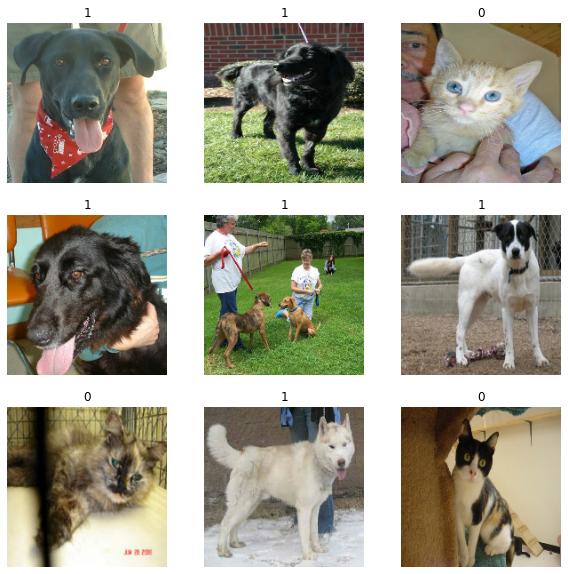

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")